# 資料類別編碼

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

## 讀取航空公司客戶滿意度資料

In [2]:
# 讀取 航空公司客戶滿意度 data
df = pd.read_csv('flight.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# 欄位Arrival Delay in Minutes有遺漏值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

## 類別型欄位轉數值型編碼

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for _ , col in enumerate(df.columns.tolist()):
    if df[col].dtype == 'object':
        print('-'*25 + col + '-'*25)
        print(df[col].value_counts())
        df[col] = labelencoder.fit_transform(df[col])
        print(df[col].value_counts())
        print('-'*50)

-------------------------satisfaction-------------------------
satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
1    71087
0    58793
Name: satisfaction, dtype: int64
--------------------------------------------------
-------------------------Gender-------------------------
Female    65899
Male      63981
Name: Gender, dtype: int64
0    65899
1    63981
Name: Gender, dtype: int64
--------------------------------------------------
-------------------------Customer Type-------------------------
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
0    106100
1     23780
Name: Customer Type, dtype: int64
--------------------------------------------------
-------------------------Type of Travel-------------------------
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
0    89693
1    40187
Name: Type of Travel, dtype: int64
--------------------------------------------------
-----------------

In [5]:
# 補值: 欄位Arrival Delay in Minutes有遺漏值
print(df[['Arrival Delay in Minutes']].isnull().values.any())
df[['Arrival Delay in Minutes']] = df[['Arrival Delay in Minutes']].fillna(0.0)
print(df[['Arrival Delay in Minutes']].isnull().values.any())

True
False


In [6]:
df.isnull().values.any()

False

In [7]:
# save file
df.to_csv('flight_satisfaction.csv', index=False)

# 建立 Logistic Regression 模型

In [8]:
# read dataset
df = pd.read_csv('flight_satisfaction.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


## 切分訓練、測試資料集

In [9]:
from sklearn.model_selection import train_test_split
# 取得特徵(移除 y label)
X = df.drop(labels=['satisfaction'] ,axis=1)
# 取得 y label
y = df['satisfaction'].values
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2 , random_state=5)
print(f'Length of training dataset: {len(X_train)} samples')
print(f'Length of testing dataset: {len(X_test)} samples')

Length of training dataset: 103904 samples
Length of testing dataset: 25976 samples


In [10]:
# X_train, X_test特徵縮放
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 模型訓練

In [11]:
# 模型訓練
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

# 輸出模型準確率
print('訓練集準確率: ', classifier.score(X_train,y_train))
print('測試集準確率: ', classifier.score(X_test,y_test))

# 模型預測測試集的結果
y_pred = classifier.predict(X_test)

訓練集準確率:  0.8355789959963043
測試集準確率:  0.8354635047736372


## 模型評估結果

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11878
           1       0.85      0.85      0.85     14098

    accuracy                           0.84     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.84      0.84      0.84     25976

--------------------------------------------------
Confusion Matrix:
[[ 9737  2141]
 [ 2133 11965]]


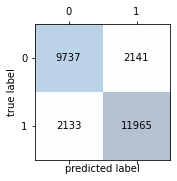

In [12]:
# 輸出 Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('-'*50)

# 輸出 Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()